# Feature extraction

# Step1
import dependencies

In [41]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

import sklearn.gaussian_process.kernels as kernels

from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Step2
load the payloads into memory

In [ ]:
payloads = pd.read_csv("data/payloads.csv",index_col='index')
display(payloads.head(30))

# Step3
feature engineering

In [4]:
def plot_feature_distribution(features):
    print('Properties of feature: ' + features.name)
    print(features.describe())
    f, ax = plt.subplots(1, figsize=(10, 6))
    ax.hist(features, bins=features.max()-features.min()+1, normed=1)
    ax.set_xlabel('value')
    ax.set_ylabel('fraction')
    
    plt.show()

,payload,is_malicious,injection_type,example
index,,,,
0,kouhi,0.0,LEGAL,1
1,8043015940180984,0.0,LEGAL,1
2,3684116630945403,0.0,LEGAL,1
3,Merck,0.0,LEGAL,1
4,wiping,0.0,LEGAL,1


Properties of feature: example
count    110378.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: example, dtype: float64


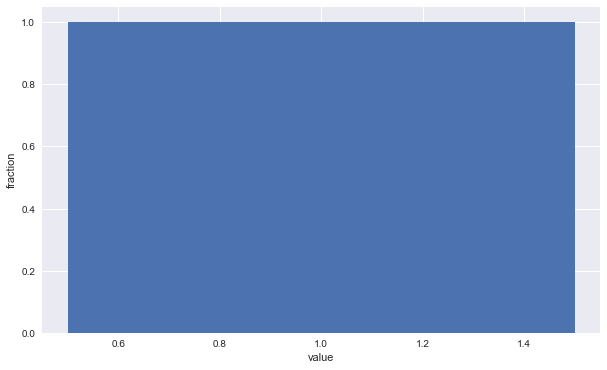

In [5]:
def create_feature_example(payloads):
    '''small description
    
    longer description
    '''
    
    payloads['example'] = [1 for row in payloads['payload']]
    return payloads

payloads = create_feature_example(payloads)
display(payloads.head())

plot_feature_distribution(payloads['example'])

,payload,is_malicious,injection_type,example,length
index,,,,,
0,kouhi,0.0,LEGAL,1,5
1,8043015940180984,0.0,LEGAL,1,16
2,3684116630945403,0.0,LEGAL,1,16
3,Merck,0.0,LEGAL,1,5
4,wiping,0.0,LEGAL,1,6


Properties of feature: length
count    110378.000000
mean         16.647538
std          33.769313
min           1.000000
25%           6.000000
50%           9.000000
75%          14.000000
max        3024.000000
Name: length, dtype: float64


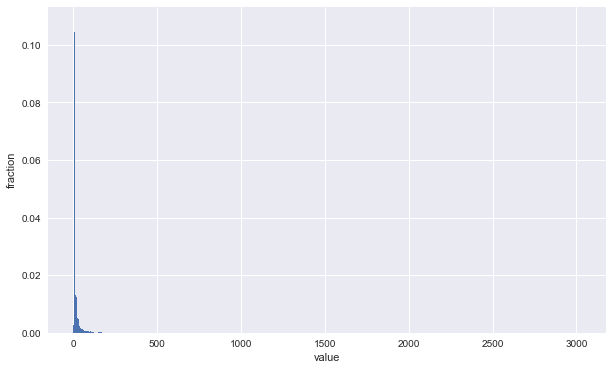

In [6]:
def create_feature_length(payloads):
    '''
        Feature describing the lengh of the input
    '''
    
    
    payloads['length'] = [len(str(row)) for row in payloads['payload']]
    return payloads


payloads = create_feature_length(payloads)
display(payloads.head())


plot_feature_distribution(payloads['length'])


In [5]:
def create_feature_non_printable_characters(payloads):  
    '''
    Feature
    Number of non printable characthers within payload
    '''
    
    payloads['non-printable'] = [ len([1 for letter in str(row) if letter not in string.printable]) for row in payloads['payload']]
    return payloads
    

create_feature_non_printable_characters(payloads)
display(payloads.head())
    
plot_feature_distribution(payloads['non-printable'])


NameError: name 'string' is not defined

,payload,is_malicious,injection_type,length,non-printable,punctuation
index,,,,,,
0,abellot*ada,0.0,LEGAL,11,0,1
1,1280x800,0.0,LEGAL,8,0,0
2,Juergen,0.0,LEGAL,7,0,0
3,ambitious,0.0,LEGAL,9,0,0
4,Shalne,0.0,LEGAL,6,0,0


Properties of feature: punctuation
count    110381.000000
mean          2.438463
std          14.209566
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        3012.000000
Name: punctuation, dtype: float64


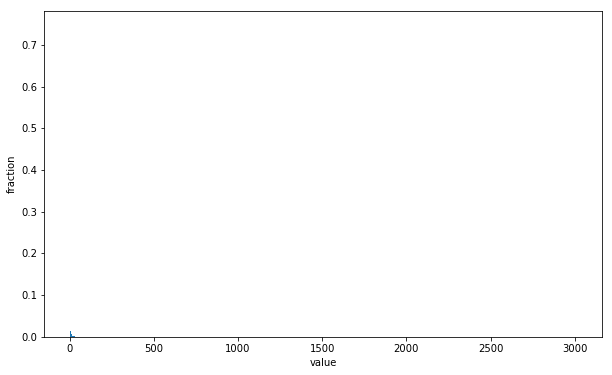

In [34]:
def create_feature_punctuation_characters(payloads):
    '''
    Feature
    Number of non printable characthers within payload
    '''
    
    payloads['punctuation'] = [ len([1 for letter in str(row) if letter in string.punctuation]) for row in payloads['payload']]
    return payloads
    

create_feature_non_printable_characters(payloads)
display(payloads.head())
    
plot_feature_distribution(payloads['punctuation'])

,payload,is_malicious,injection_type,length,non-printable,punctuation,min_byte,distinct_bytes,min-byte
index,,,,,,,,,
0,abellot*ada,0.0,LEGAL,11,0,1,42,8,42
1,1280x800,0.0,LEGAL,8,0,0,48,5,48
2,Juergen,0.0,LEGAL,7,0,0,74,6,74
3,ambitious,0.0,LEGAL,9,0,0,97,8,97
4,Shalne,0.0,LEGAL,6,0,0,83,6,83


Properties of feature: min-byte
count    110381.000000
mean         71.207980
std          26.557383
min           9.000000
25%          48.000000
50%          75.000000
75%          97.000000
max         125.000000
Name: min-byte, dtype: float64


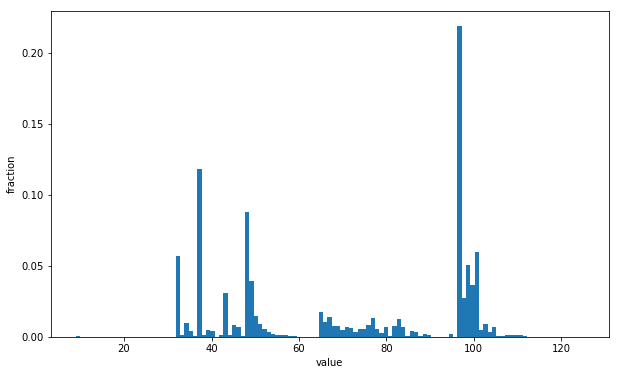

In [53]:
def create_feature_min_byte_value(payloads):
    '''
    Feature
    Minimum byte value in payload
    '''
    
    payloads['min-byte'] = [ min(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_min_byte_value(payloads)
display(payloads.head())

plot_feature_distribution(payloads['min-byte'])

,payload,is_malicious,injection_type,length,non-printable,punctuation,min_byte,distinct_bytes,min-byte,max-byte
index,,,,,,,,,,
0,abellot*ada,0.0,LEGAL,11,0,1,42,8,42,116
1,1280x800,0.0,LEGAL,8,0,0,48,5,48,120
2,Juergen,0.0,LEGAL,7,0,0,74,6,74,117
3,ambitious,0.0,LEGAL,9,0,0,97,8,97,117
4,Shalne,0.0,LEGAL,6,0,0,83,6,83,110


Properties of feature: max-byte
count    110381.000000
mean        109.523731
std          20.280638
min          35.000000
25%         114.000000
50%         116.000000
75%         118.000000
max         240.000000
Name: max-byte, dtype: float64


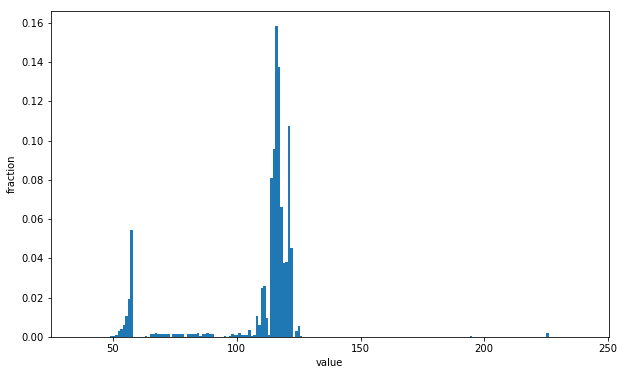

In [59]:
def create_feature_max_byte_value(payloads):
    '''
    Feature
    Maximum byte value in payload
    '''
    
    payloads['max-byte'] = [ max(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_max_byte_value(payloads)
display(payloads.head())

plot_feature_distribution(payloads['max-byte'])

,payload,is_malicious,injection_type,length,non-printable,punctuation,min_byte,distinct_bytes,min-byte,max-byte,distinct-bytes
index,,,,,,,,,,,
0,abellot*ada,0.0,LEGAL,11,0,1,42,8,42,116,8
1,1280x800,0.0,LEGAL,8,0,0,48,5,48,120,5
2,Juergen,0.0,LEGAL,7,0,0,74,6,74,117,6
3,ambitious,0.0,LEGAL,9,0,0,97,8,97,117,8
4,Shalne,0.0,LEGAL,6,0,0,83,6,83,110,6


Properties of feature: distinct-bytes
count    110381.000000
mean          9.505612
std           7.453468
min           1.000000
25%           5.000000
50%           7.000000
75%          10.000000
max          77.000000
Name: distinct-bytes, dtype: float64


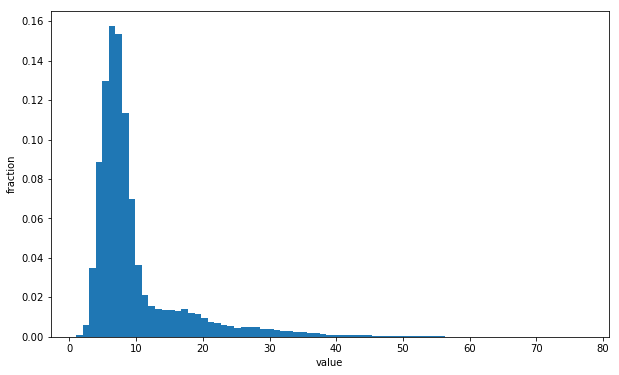

In [71]:
def create_feature_distinct_bytes(payloads):
    '''
    Feature
    Number of distinct bytes in payload
    '''
    
    payloads['distinct-bytes'] = [ len(list(set(bytearray(str(row), 'utf8')))) for row in payloads['payload']]
    return payloads

create_feature_distinct_bytes(payloads)
display(payloads.head())

plot_feature_distribution(payloads['distinct-bytes'])

,payload,is_malicious,injection_type,length,non-printable,punctuation,min_byte,distinct_bytes,min-byte,max-byte,distinct-bytes,sql-keywords
index,,,,,,,,,,,,
0,abellot*ada,0.0,LEGAL,11,0,1,42,8,42,116,8,0
1,1280x800,0.0,LEGAL,8,0,0,48,5,48,120,5,0
2,Juergen,0.0,LEGAL,7,0,0,74,6,74,117,6,0
3,ambitious,0.0,LEGAL,9,0,0,97,8,97,117,8,0
4,Shalne,0.0,LEGAL,6,0,0,83,6,83,110,6,0
5,joann,0.0,LEGAL,5,0,0,97,4,97,111,4,0
6,tonnage,0.0,LEGAL,7,0,0,97,6,97,116,6,0
7,Kowtow,0.0,LEGAL,6,0,0,75,4,75,119,4,0
8,3683134199988856,0.0,LEGAL,16,0,0,49,7,49,57,7,0


Properties of feature: sql-keywords
count    110381.000000
mean          0.000326
std           0.018057
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: sql-keywords, dtype: float64


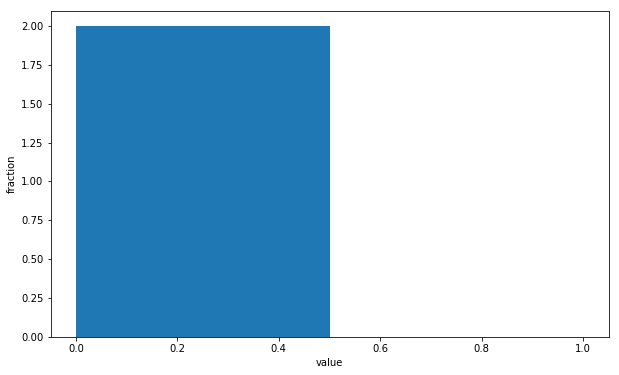

In [78]:
sql_keywords = pd.read_csv('data/SQLKeywords.txt', index_col=False)

def create_feature_sql_keywords(payloads):
    '''
    Feature
    Number of SQL keywords within payload
    '''
    
    #payloads['punctuation'] = [ len([1 for letter in str(row) if letter in sql_keywords]) for row in payloads['payload']]
    payloads['sql-keywords'] = [ len([1 for keyword in sql_keywords if keyword.lower() in str(row).lower()]) for row in payloads['payload']]
    return payloads
    

create_feature_sql_keywords(payloads)
display(payloads.head(100))
    
plot_feature_distribution(payloads['sql-keywords'])
    
    

# Step3 B
Feature engineering using bag of words techniques.  
The following vectorizers below is another way of creating features for text input.
We will test the performance of these techniques independently from our custom features in Step 3A.
We will create vectorizers of these combinations:
- 1-grams CountVectorizer
- 2-grams CountVectorizer
- 3-grams CountVectorizer
- 1-grams TfidfVectorizer
- 2-grams TfidfVectorizer
- 3-grams TfidfVectorizer

The type of N-gram function determines how the actual "words" should be created from the payload string  
Each vectorizer is used later in Step4 in Pipeline objects before training

### 1-Grams features
create a Countvectorizer and TF-IDFvectorizer that uses 1-grams.  
1-grams equals one feature for each letter/symbol recorded

In [27]:
def get1Grams(payload_obj):
    '''Divides a string into 1-grams
    
    Example: input - payload: "<script>"
             output- ["<","s","c","r","i","p","t",">"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-1):
        ngrams.append(payload[i:i+1])
    return ngrams

tfidf_vectorizer_1grams = TfidfVectorizer(tokenizer=get1Grams)
count_vectorizer_1grams = CountVectorizer(min_df=1, tokenizer=get1Grams)

### 2-Grams features
create a Countvectorizer and TF-IDFvectorizer that uses 2-grams.  

In [28]:
def get2Grams(payload_obj):
    '''Divides a string into 2-grams
    
    Example: input - payload: "<script>"
             output- ["<s","sc","cr","ri","ip","pt","t>"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-2):
        ngrams.append(payload[i:i+2])
    return ngrams

tfidf_vectorizer_2grams = TfidfVectorizer(tokenizer=get2Grams)
count_vectorizer_2grams = CountVectorizer(min_df=1, tokenizer=get2Grams)

### 3-Grams features
Create a Countvectorizer and TF-IDFvectorizer that uses 3-grams

In [29]:
def get3Grams(payload_obj):
    '''Divides a string into 3-grams
    
    Example: input - payload: "<script>"
             output- ["<sc","scr","cri","rip","ipt","pt>"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-3):
        ngrams.append(payload[i:i+3])
    return ngrams

tfidf_vectorizer_3grams = TfidfVectorizer(tokenizer=get3Grams)
count_vectorizer_3grams = CountVectorizer(min_df=1, tokenizer=get3Grams)

#  Step4
Model selection and evaluation

First, we will automate hyperparameter tuning and out of sample testing using train_model below

In [30]:
def train_model(clf, param_grid, X, Y):
    '''Trains and evaluates the model clf from input
    
    The function selects the best model of clf by optimizing for the validation data,
    then evaluates its performance using the out of sample test data.
    
    input - clf: the model to train
            param_grid: a dict of hyperparameters to use for optimization
            X: features
            Y: labels
    
    output - the best estimator (trained model)
             the confusion matrix from classifying the test data
    '''
    
    #First, partition into train and test data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    n_iter = 3
    #If number of possible iterations are less than prefered number of iterations, 
    #set it to the number of possible iterations
    n_iter = min(n_iter,np.prod([ len(xs) for xs in param_grid.values()]))
    
    #perform a grid search for the best parameters on the training data.
    #Cross validation is made to select the parameters, so the training data is actually split into
    #a new train data set and a validation data set, K number of times
    cv = ShuffleSplit(n=len(X_train), n_iter=1, test_size=0.2, random_state=0) #DEBUG: n_iter=10
    #cv = KFold(n=len(X), n_folds=10)
    random_grid_search = RandomizedSearchCV(
        clf, 
        param_distributions=param_grid,
        cv=cv, 
        scoring='f1', 
        n_iter=n_iter, #DEBUG 1 
        random_state=5,
        refit=True,
        verbose=10
    )
    
    '''Randomized search used instead. We have limited computing power
    grid_search = GridSearchCV(
        clf,
        param_grid=param_grid,
        cv=cv,
        scoring='f1', #accuracy/f1/f1_weighted all give same result?
        verbose=10,
        n_jobs=-1
    )
    grid_search.fit(X_train, Y_train)
    '''
    random_grid_search.fit(X_train, Y_train)
    
    #Evaluate the best model on the test data
    Y_test_predicted = random_grid_search.best_estimator_.predict(X_test)
    Y_test_predicted_prob = random_grid_search.best_estimator_.predict_proba(X_test)[:, 1]

    confusion = confusion_matrix(Y_test, Y_test_predicted)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    #Calculate recall (sensitivity) from confusion matrix
    sensitivity = TP / float(TP + FN)
    
    #Calculate specificity from confusion matrix
    specificity = TN / float(TN + FP)

    #Calculate accuracy
    accuracy = (confusion[0][0] + confusion[1][1]) / (confusion.sum().sum())
    
    #Calculate axes of ROC curve
    fpr, tpr, thresholds = roc_curve(Y_test, Y_test_predicted_prob)
    
    #Area under the ROC curve
    auc = roc_auc_score(Y_test, Y_test_predicted_prob)

    return {
        'conf_matrix':confusion, 
        'accuracy':accuracy, 
        'sensitivity':sensitivity,
        'specificity':specificity,
        'auc':auc,
        'params':random_grid_search.best_params_,
        'model':random_grid_search.best_estimator_,
        'roc':{'fpr':fpr,'tpr':tpr,'thresholds':thresholds}
    }



Then, we will use the train_model function to train, optimize and retrieve out of sample testing results from a range of classifiers.
These are the classifiers we will evaluate the performance on:
 - Logistic Regression
 - K-Nearest Neighbors
 - Support Vector Machine
 - Decision Tree
 - Gaussian Naive Bayes
 - ...  
 And all their best parameters with their performance is stored in a dataframe called classifier_results

In [44]:
def create_classifier_inputs_using_vectorizers(vectorizer, subscript):
    '''make pipelines of the specified vectorizer with the classifiers to train
    
    input - vectorizer: the vectorizer to add to the pipelines
            subscript:  subscript name for the dictionary key
            
    output - A dict of inputs to use for train_model(); a pipeline and a dict of params to optimize
    '''
    
    classifier_inputs = {}
    
    '''
    from sklearn.neural_network import MLPClassifier
    '''
    
    
    classifier_inputs[subscript + ' MultinomialNB'] = {
        'pipeline':Pipeline([('vect', vectorizer),('clf',MultinomialNB())]),
        'dict_params': {
            'vect__min_df':[1,10]
        }
    }
    classifier_inputs[subscript + ' RandomForest'] = {
        'pipeline':Pipeline([('vect', vectorizer),('clf',RandomForestClassifier(
            max_depth=None,min_samples_split=2, random_state=0))]),
        'dict_params': {
            'vect__min_df':[1,10],
            'clf__n_estimators':[5,10,20]
        }
    }
    '''
    classifier_inputs[subscript + ' Logistic'] = {
        'pipeline':Pipeline([('vect', vectorizer), ('clf',LogisticRegression())]),
        'dict_params': {
            'vect__min_df':[1, 10],
            'clf__C':[10]
        }
    }
    classifier_inputs[subscript + ' SVM'] = {
        'pipeline':Pipeline([('vect', vectorizer), ('clf',SVC(probability=True))]),
        'dict_params': {
            'vect__min_df':[1, 10],
            'clf__C':[0.1,1,10],
            'clf__kernel':['rbf','poly']
        }
    }'''
    
    
    return classifier_inputs

In [42]:
#Train all classifiers

classifier_inputs = {}
classifier_inputs.update(create_classifier_inputs_using_vectorizers(count_vectorizer_1grams,'count 1grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(count_vectorizer_2grams,'count 2grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(count_vectorizer_3grams,'count 3grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(tfidf_vectorizer_1grams,'tfidf 1grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(tfidf_vectorizer_2grams,'tfidf 2grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(tfidf_vectorizer_3grams,'tfidf 3grams'))

'''
add classifier inputs for custom features
gaussiannb
QuadraticDiscriminantAnalysis
classifier_inputs[subscript + ' GPC'] = {
        'pipeline':Pipeline([('vect', vectorizer),('clf',GaussianProcessClassifier())]),
        'dict_params': {
            'vect__min_df':[1,10],
            'clf__kernel':[
                1.0*kernels.RBF(1.0),
                1.0*kernels.Matern(),
                1.0*kernels.RationalQuadratic(),
                1.0*kernels.DotProduct()
            ]
        }
    }
'''

classifier_results = pd.DataFrame(columns=['accuracy','sensitivity','specificity','auc','conf_matrix','params','model','roc'],index=classifier_inputs.keys())
    
X = payloads['payload'][:30000] #DEBUG: only first 10k rows
Y = payloads['is_malicious'][:30000]

for classifier_name, inputs in classifier_inputs.items():
    result_dict = train_model(inputs['pipeline'],inputs['dict_params'],X,Y)
    classifier_results.loc[classifier_name] = result_dict

#Save classifiers in a pickle file to be able to re-use them without re-training
pickle.dump( classifier_results, open( "data/trained_classifiers.p", "wb" ) )

display(classifier_results)

Fitting 1 folds for each of 2 candidates, totalling 2 fits
[CV] vect__min_df=1 ..................................................
[CV] ................... vect__min_df=1, score=0.952270, total=   0.5s
[CV] vect__min_df=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .................. vect__min_df=10, score=0.940211, total=   0.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s finished


Fitting 1 folds for each of 3 candidates, totalling 3 fits
[CV] vect__min_df=10, clf__n_estimators=20 ...........................
[CV]  vect__min_df=10, clf__n_estimators=20, score=0.984431, total=   1.0s
[CV] vect__min_df=1, clf__n_estimators=10 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  vect__min_df=1, clf__n_estimators=10, score=0.980815, total=   0.6s
[CV] vect__min_df=1, clf__n_estimators=20 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]  vect__min_df=1, clf__n_estimators=20, score=0.978417, total=   0.8s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished


Fitting 1 folds for each of 2 candidates, totalling 2 fits
[CV] vect__min_df=1 ..................................................
[CV] ................... vect__min_df=1, score=0.953202, total=   0.5s
[CV] vect__min_df=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .................. vect__min_df=10, score=0.944444, total=   0.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s finished


Fitting 1 folds for each of 2 candidates, totalling 2 fits
[CV] vect__min_df=1 ..................................................
[CV] ................... vect__min_df=1, score=0.960094, total=   0.4s
[CV] vect__min_df=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .................. vect__min_df=10, score=0.952047, total=   0.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s finished


Fitting 1 folds for each of 3 candidates, totalling 3 fits
[CV] vect__min_df=10, clf__n_estimators=20 ...........................
[CV]  vect__min_df=10, clf__n_estimators=20, score=0.958537, total=   2.0s
[CV] vect__min_df=1, clf__n_estimators=10 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  vect__min_df=1, clf__n_estimators=10, score=0.955665, total=   1.4s
[CV] vect__min_df=1, clf__n_estimators=20 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV]  vect__min_df=1, clf__n_estimators=20, score=0.958128, total=   2.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.9s finished


Fitting 1 folds for each of 3 candidates, totalling 3 fits
[CV] vect__min_df=10, clf__n_estimators=20 ...........................
[CV]  vect__min_df=10, clf__n_estimators=20, score=0.949275, total=   1.7s
[CV] vect__min_df=1, clf__n_estimators=10 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  vect__min_df=1, clf__n_estimators=10, score=0.955446, total=   1.4s
[CV] vect__min_df=1, clf__n_estimators=20 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV]  vect__min_df=1, clf__n_estimators=20, score=0.956843, total=   2.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.5s finished


Fitting 1 folds for each of 3 candidates, totalling 3 fits
[CV] vect__min_df=10, clf__n_estimators=20 ...........................
[CV]  vect__min_df=10, clf__n_estimators=20, score=0.975962, total=   0.9s
[CV] vect__min_df=1, clf__n_estimators=10 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  vect__min_df=1, clf__n_estimators=10, score=0.973430, total=   0.6s
[CV] vect__min_df=1, clf__n_estimators=20 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV]  vect__min_df=1, clf__n_estimators=20, score=0.975845, total=   0.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished


Fitting 1 folds for each of 2 candidates, totalling 2 fits
[CV] vect__min_df=1 ..................................................
[CV] ................... vect__min_df=1, score=0.942472, total=   0.3s
[CV] vect__min_df=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .................. vect__min_df=10, score=0.942472, total=   0.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s finished


Fitting 1 folds for each of 2 candidates, totalling 2 fits
[CV] vect__min_df=1 ..................................................
[CV] ................... vect__min_df=1, score=0.939929, total=   0.3s
[CV] vect__min_df=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .................. vect__min_df=10, score=0.941176, total=   0.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s finished


Fitting 1 folds for each of 2 candidates, totalling 2 fits
[CV] vect__min_df=1 ..................................................
[CV] ................... vect__min_df=1, score=0.963592, total=   0.4s
[CV] vect__min_df=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .................. vect__min_df=10, score=0.966102, total=   0.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s finished


Fitting 1 folds for each of 3 candidates, totalling 3 fits
[CV] vect__min_df=10, clf__n_estimators=20 ...........................
[CV]  vect__min_df=10, clf__n_estimators=20, score=0.968370, total=   1.2s
[CV] vect__min_df=1, clf__n_estimators=10 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  vect__min_df=1, clf__n_estimators=10, score=0.969475, total=   0.8s
[CV] vect__min_df=1, clf__n_estimators=20 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV]  vect__min_df=1, clf__n_estimators=20, score=0.970803, total=   1.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s finished


Fitting 1 folds for each of 3 candidates, totalling 3 fits
[CV] vect__min_df=10, clf__n_estimators=20 ...........................
[CV]  vect__min_df=10, clf__n_estimators=20, score=0.978417, total=   0.7s
[CV] vect__min_df=1, clf__n_estimators=10 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  vect__min_df=1, clf__n_estimators=10, score=0.978313, total=   0.5s
[CV] vect__min_df=1, clf__n_estimators=20 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  vect__min_df=1, clf__n_estimators=20, score=0.981993, total=   0.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s finished


,accuracy,sensitivity,specificity,auc,conf_matrix,params,model,roc
count 3grams MultinomialNB,0.991667,0.972777,0.993577,0.993164,"[[5414, 35], [15, 536]]",{'vect__min_df': 1},"Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 0.0, 0.00018351991191, 0.0001835..."
tfidf 1grams RandomForest,0.997167,0.981851,0.998715,0.999002,"[[5442, 7], [10, 541]]","{'vect__min_df': 10, 'clf__n_estimators': 20}","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.00018351991191, 0.00..."
tfidf 3grams MultinomialNB,0.992833,0.931034,0.999082,0.995935,"[[5444, 5], [38, 513]]",{'vect__min_df': 1},"Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018..."
count 2grams MultinomialNB,0.993667,0.981851,0.994861,0.990992,"[[5421, 28], [10, 541]]",{'vect__min_df': 1},"Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 0.00018351991191, 0.000183519911..."
tfidf 3grams RandomForest,0.992333,0.92559,0.999082,0.999016,"[[5444, 5], [41, 510]]","{'vect__min_df': 10, 'clf__n_estimators': 20}","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
count 3grams RandomForest,0.9915,0.914701,0.999266,0.998208,"[[5445, 4], [47, 504]]","{'vect__min_df': 1, 'clf__n_estimators': 20}","Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
count 2grams RandomForest,0.994167,0.965517,0.997064,0.998628,"[[5433, 16], [19, 532]]","{'vect__min_df': 10, 'clf__n_estimators': 20}","Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0003670398..."
tfidf 1grams MultinomialNB,0.989667,0.92196,0.996513,0.994513,"[[5430, 19], [43, 508]]",{'vect__min_df': 1},"Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'fpr': [0.0, 0.0, 0.00018351991191, 0.0001835..."
count 1grams MultinomialNB,0.991833,0.969147,0.994127,0.98187,"[[5417, 32], [17, 534]]",{'vect__min_df': 10},"Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 0.00018351991191, 0.000183519911..."
tfidf 2grams MultinomialNB,0.994333,0.954628,0.998348,0.997003,"[[5440, 9], [25, 526]]",{'vect__min_df': 10},"Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018..."


In [21]:
#OR load classifiers from pickle if already trained
classifier_results = pickle.load( open( "data/trained_classifiers.p", "rb" ) )
display(classifier_results)


,accuracy,sensitivity,specificity,auc,conf_matrix,params,model,roc
count 1grams Logistic,0.996,0.965517,0.999082,0.998451,"[[5444, 5], [19, 532]]","{'vect__min_df': 1, 'clf__C': 10}","Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
tfidf 3grams SVM,0.908167,0,1,0.00570477,"[[5449, 0], [551, 0]]","{'vect__min_df': 10, 'clf__kernel': 'poly', 'c...","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'fpr': [0.0, 0.00018351991191, 0.000550559735..."
count 3grams Logistic,0.993667,0.934664,0.999633,0.997262,"[[5447, 2], [36, 515]]","{'vect__min_df': 1, 'clf__C': 10}","Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
count 2grams RandomForest,0.994167,0.965517,0.997064,0.998628,"[[5433, 16], [19, 532]]","{'clf__n_estimators': 20, 'vect__min_df': 10}","Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0003670398..."
tfidf 1grams SVM,0.988167,0.883848,0.998715,0.997209,"[[5442, 7], [64, 487]]","{'vect__min_df': 10, 'clf__kernel': 'rbf', 'cl...","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.00018351991191,..."
tfidf 2grams RandomForest,0.996167,0.967332,0.999082,0.998739,"[[5444, 5], [18, 533]]","{'clf__n_estimators': 20, 'vect__min_df': 1}","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
count 2grams SVM,0.980667,0.793103,0.999633,0.988931,"[[5447, 2], [114, 437]]","{'vect__min_df': 10, 'clf__kernel': 'rbf', 'cl...","Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 0.0, 0.00018351991191, 0.0001835..."
count 3grams SVM,0.966333,0.635209,0.999816,0.984007,"[[5448, 1], [201, 350]]","{'vect__min_df': 10, 'clf__kernel': 'rbf', 'cl...","Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 0.0, 0.00018351991191, 0.0001835..."
count 3grams RandomForest,0.9915,0.914701,0.999266,0.998208,"[[5445, 4], [47, 504]]","{'clf__n_estimators': 20, 'vect__min_df': 1}","Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
tfidf 3grams Logistic,0.9925,0.92196,0.999633,0.996683,"[[5447, 2], [43, 508]]","{'vect__min_df': 10, 'clf__C': 10}","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."


# Step5
Visualize results. We construct a function visualize_result that can present the performance of each row from classifier_results in a visually appealing way using tables and graphs

In [72]:
def visualize_result(df_row):
    '''Visualizes the results of a classifier
    
    input - df_row: a dataframe row with columns: ['accuracy','sensitivity','specificity','auc','conf_matrix','params','roc']
    '''
    
    print('Performance for classifier ' + str(df_row.name) + ' with parameters: ' + str(df_row['params']))
    print('Accuracy: \t' + str(df_row['accuracy']))
    print('Sensitivity: \t' + str(df_row['sensitivity']))
    print('Specificity: \t' + str(df_row['specificity']))
    print('AUC: \t' + str(df_row['auc']))
    
    f, (ax1, ax2) = plt.subplots(1,2)
    f.set_figheight(8)
    f.set_figwidth(15)
    
    #Subplot 1, ROC curve
    ax1.plot(df_row['roc']['fpr'], df_row['roc']['tpr'])
    ax1.set_xlim([0, 1])
    ax1.set_ylim([0, 1.0])
    ax1.set_title('ROC curve for payload classifier')
    ax1.set_xlabel('False Positive Rate (1 - Specificity)')
    ax1.set_ylabel('True Positive Rate (Sensitivity)')
    ax1.grid(True)
    
    #subplot 2, ROC curve zoomed
    ax2.plot(df_row['roc']['fpr'], df_row['roc']['tpr'])
    ax2.set_xlim([0, 0.6])
    ax2.set_ylim([0.8, 1.0])
    ax2.set_title('ROC curve for payload classifier (Zoomed)')
    ax2.set_xlabel('False Positive Rate (1 - Specificity)')
    ax2.set_ylabel('True Positive Rate (Sensitivity)')
    ax2.grid(True)
    plt.show()
    
    confusion_table = pd.DataFrame(df_row['conf_matrix'], index=['True class = 0','True class = 1'], columns=['Predicted class = 0','Predicted class = 1'])
    print('Confusion matrix:')
    display(confusion_table)

### Result Support Vectore Machine

Performance for classifier svm with parameters: {'clf__kernel': 'rbf', 'clf__C': 10, 'vect__min_df': 10}
Accuracy: 	0.981333333333
Sensitivity: 	0.798548094374
Specificity: 	0.999816480088
AUC: 	0.992037367452


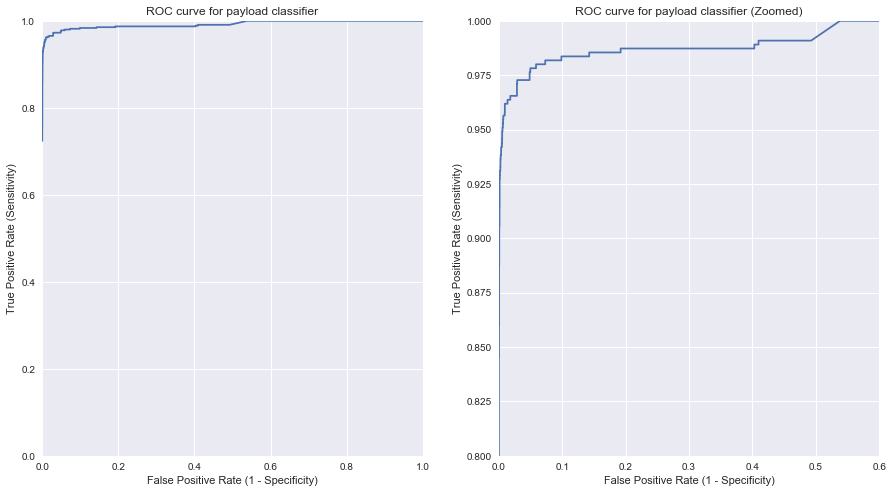

Confusion matrix:


,Predicted class = 0,Predicted class = 1
True class = 0,5448,1
True class = 1,111,440


In [75]:
visualize_result(classifier_results.iloc[1])

# (Step6)
we can display which types of queries the classifiers failed to classify. These are interesting to examine for further work on how to improve the classifier

In [38]:
pipe = Pipeline([('vect', vectorizer), ('clf',LogisticRegression(C=10))])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    
#perform a grid search for the best parameters on the training data.
#Cross validation is made to select the parameters, so the training data is actually split into
#a new train data set and a validation data set, K number of times
cv = ShuffleSplit(n=len(X_train), n_iter=1, test_size=0.2, random_state=0) #DEBUG: n_iter=10
#cv = KFold(n=len(X), n_folds=10)
random_grid_search = RandomizedSearchCV(
    pipe, 
    param_distributions={
        'clf__C':[10]
    },
    cv=cv, 
    scoring='roc_auc', 
    n_iter=1, 
    random_state=5,
    refit=True
)
random_grid_search.fit(X_train, Y_train)

#Evaluate the best model on the test data
Y_test_predicted = random_grid_search.best_estimator_.predict(X_test)


index
28660    dojo.io.script.jsonp_dojoIoScript60693._jsonpC...
17914                                      127.0.0.1 | id|
Name: payload, dtype: object

In [45]:
#Payloads classified incorrectly
pd.options.display.max_colwidth = 200
print('False positives')
print(X_test[(Y_test == 0) & (Y_test_predicted == 1)])
print('False negatives')
print(X_test[(Y_test == 1) & (Y_test_predicted == 0)])

False positives
index
28660    dojo.io.script.jsonp_dojoIoScript60693._jsonpCallback
17914                                          127.0.0.1 | id|
Name: payload, dtype: object
False negatives
index
8224                                                                                                                                                    '<'s'v'g' o'n'l'o'a'd'='a'l'e'r't'('7')' '>'
250                                                                                                                                                                b'<? popen($_REQUEST["c4"]); ?> '
9145                                                                                                                                                                       > XSS | Replacive Fuzzers
10000                                                                                                                                                                                           ;id;
9817         

In [89]:
a = {'a':1}
aa = {'b':2}
aaa = {}
aaa.update(a)
aaa.update(aa)
print(aaa)

{'a': 1, 'b': 2}
